# Table of Contents

-  Dataset Description


-  Exploratory Data Analysis through visuals



     - Univariate Analysis

    - Bivariate Analysis

    - Multivariate Analysis


- Observations


#### Dataset Description

- The dataset consists of the Indian Premier League is a professional Twenty20 cricket league matches information happened in India from the years between `2008` to `2017`

#### Exploratory Data Analysis through visuals

- The entire following analysis (plots and descriptive statistics) is for all years combinely but not to a specific year.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
#checking top 5 rows of datset

df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#checking the dimensions

df.shape

(636, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
#dropping the columns

df.drop(['umpire3', 'id', 'date'], axis=1, inplace=True)

- I have decided to drop the columns `umpire3`, `id` as these are not much helpful for the analysis and I have also decided to delete `date` to make the data `tidy`

In [7]:
df.shape

(636, 15)

In [8]:
#checking for missing values

df.isnull().any()

season             False
city                True
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
dtype: bool

In [9]:
#counting the missing values in columns

df.isnull().sum()

season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

- We can see that the `city`, `winner`, `player_of_match`, `umpire1`, `umpire2` has missing values in them and considerably the numbers are small, so I chose to delete the rows with missing values.

In [10]:
df.dropna(inplace = True)
df.isnull().sum().sum()

0

In [11]:
df.shape

(625, 15)

### Univariate Analysis

- In this analysis, I have decided to explore the features including  `toss_winner`, `toss_decision`, `result`,	`dl_applied`, `winner`, `win_by_runs`,	`win_by_wickets`,	`player_of_match`,`venue`

In [12]:
#creating a function for barplot as I have used bar plot a lot in this analysis

def bar_plot(variable, xlabel, ylabel, title):
    plt.figure(figsize = (9,6))
    variable.value_counts().plot(kind = 'bar')
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 15)

### What are the total number of matches played in every year ?

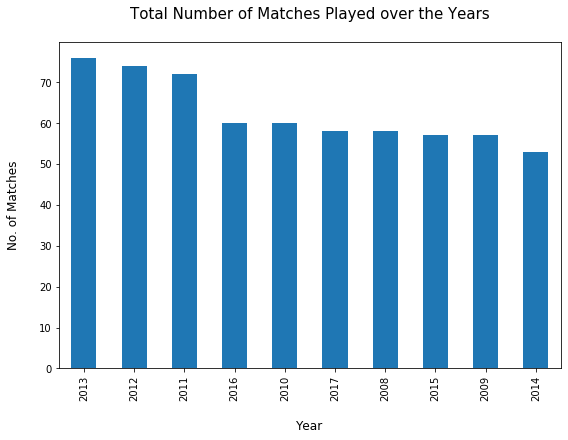

In [13]:
bar_plot(df.season, '\nYear', 'No. of Matches\n', 'Total Number of Matches Played over the Years\n')

**Observation**


- The highest t-20 IPL matches happened in the year of 2013 and least are in the year of 2014.

### Which team has won the toss most number  of times ?

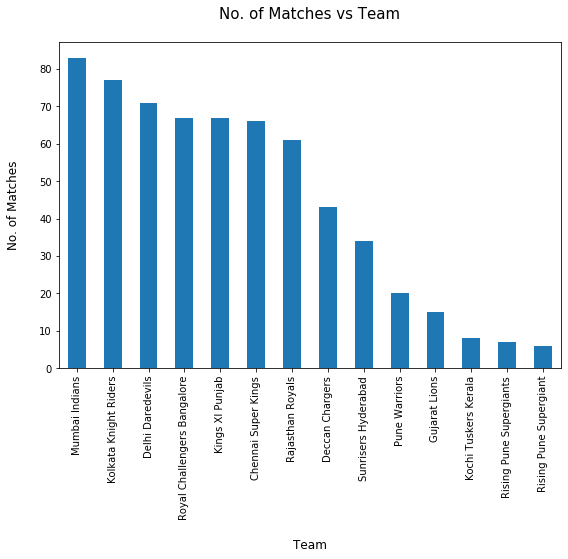

In [14]:
bar_plot(df.toss_winner, '\nTeam', 'No. of Matches\n', 'No. of Matches vs Team\n')

**Observation**

- Mumbai Indians is looking like dominant team in winning tosses and where as Rising Pune Supergiant is the team with least wins.

### How does the distribution of winning runs for teams look like ?

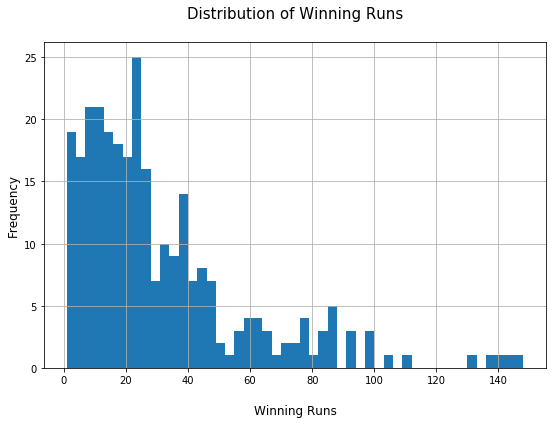

In [15]:
#creating bins with equal portions using min an dmax values of the feature

plt.figure(figsize = (9,6))
bin_edges = np.arange(df[df.win_by_runs != 0].win_by_runs.min(), df[df.win_by_runs != 0].win_by_runs.max()+3, 3);
df[df.win_by_runs != 0].win_by_runs.hist(bins = bin_edges);
plt.title('Distribution of Winning Runs\n', fontsize = 15);
plt.xlabel('\nWinning Runs', fontsize = 12);
plt.ylabel('Frequency', fontsize = 12);

**Obsrvation**

- The distribution of the feature `won_the_run` has a right skewed distribution and most of the times the teams wins with < 40 runs difference.

### What are the total number of matches played at different venues ?

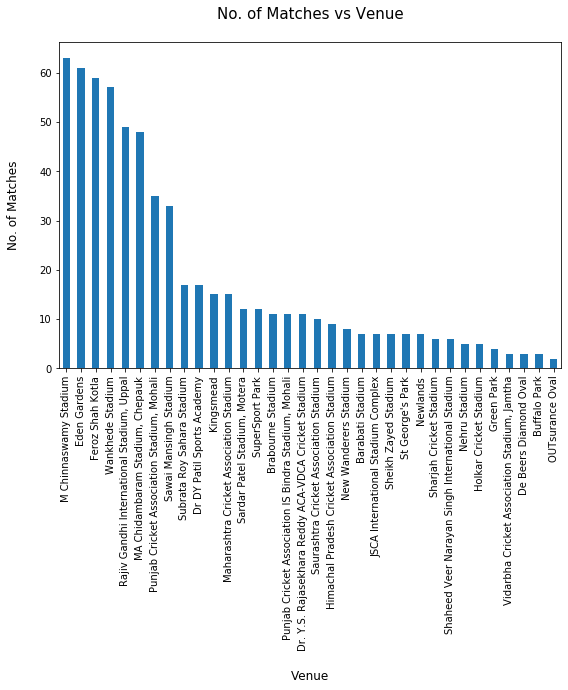

In [16]:
bar_plot(df.venue, '\nVenue', 'No. of Matches\n', 'No. of Matches vs Venue\n')
plt.xticks(rotation = 90);

**Observation**

- M Chinnaswamy Stadium has hosted most number of matches and the `Vidarbha Cricket Associationn Stadium, Jamntha` has conducted least number of matches.

### How many times DLS method applied to a match ?

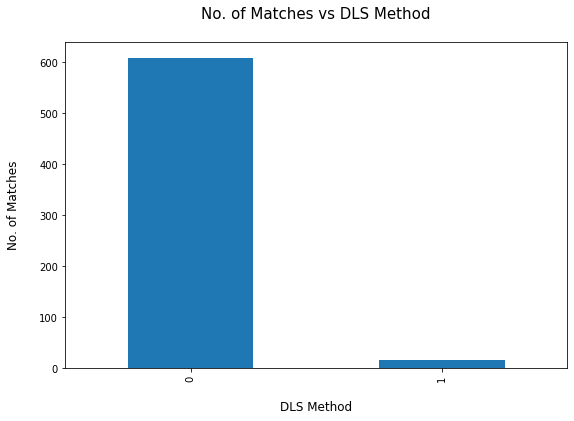

In [17]:
bar_plot(df.dl_applied, '\nDLS Method', 'No. of Matches\n', 'No. of Matches vs DLS Method\n')


- It's obvious that usually very ocassionally match conduct by DLS method due to the raining conditions

## How many wickets left when a team chased the total to win and their occurances?


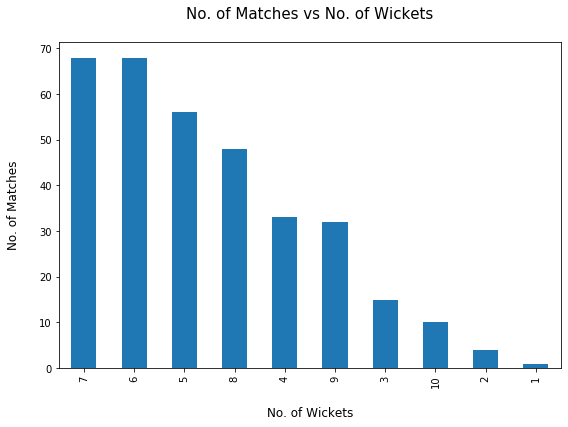

In [18]:
bar_plot(df[df.win_by_wickets!=0].win_by_wickets, '\nNo. of Wickets', 'No. of Matches\n', 'No. of Matches vs No. of Wickets\n')


**Observation**

- Most of the times, the teams chased the scored with 7 wickets in hand 

### What is the toss decision ratio ?

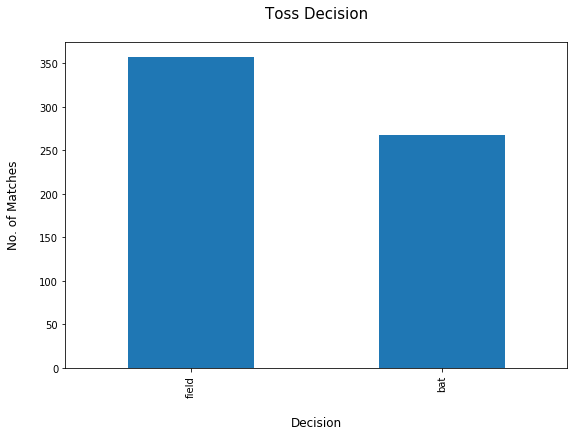

In [19]:
bar_plot(df.toss_decision, '\nDecision', 'No. of Matches\n', 'Toss Decision\n')


**Observation**

- After winning the toss, most of the time decided to chose field and opted to chase the score.

### Who are the most valuable  players?

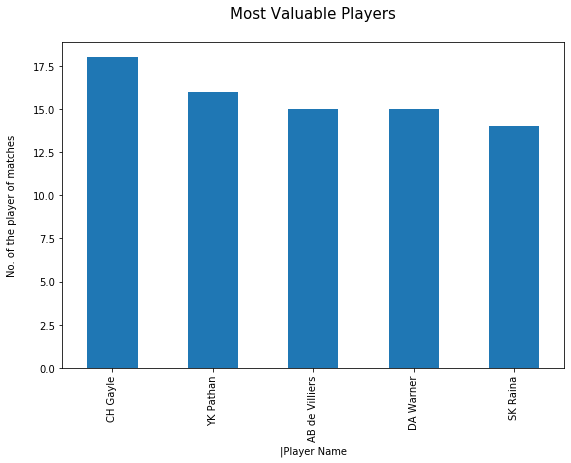

In [39]:
#creating bar plot using value_counts() function

plt.figure(figsize = (9,6))
df.player_of_match.value_counts().sort_values(ascending = False).head(5).plot(kind = 'bar');
plt.xlabel('|Player Name', fontsize = 10);
plt.ylabel('No. of the player of matches\n',  fontsize = 10);
plt.title('Most Valuable Players\n', fontsize = 15);

**Observation**

- `CH Gayle`, `YK Pathan`, `DA Warner`, `AB de Villiers` and `RG Sharma` are the most top 5 most valueble player and I have made this decision on the basis of number of the `player_of_the_match` 

### Bivariate Analysis

In [21]:
#finding the average winning runnings for teams using groupby function

df[df.win_by_runs!=0].groupby('winner')['win_by_runs'].mean().sort_values(ascending  = False)

winner
Royal Challengers Bangalore    40.724138
Rajasthan Royals               35.695652
Chennai Super Kings            35.111111
Mumbai Indians                 32.595745
Kolkata Knight Riders          28.935484
Delhi Daredevils               27.190476
Kings XI Punjab                26.937500
Rising Pune Supergiants        26.500000
Rising Pune Supergiant         24.600000
Deccan Chargers                23.388889
Pune Warriors                  23.166667
Sunrisers Hyderabad            21.761905
Kochi Tuskers Kerala           11.500000
Gujarat Lions                   1.000000
Name: win_by_runs, dtype: float64

## What are the average winning runs for teams which are batting at first ?

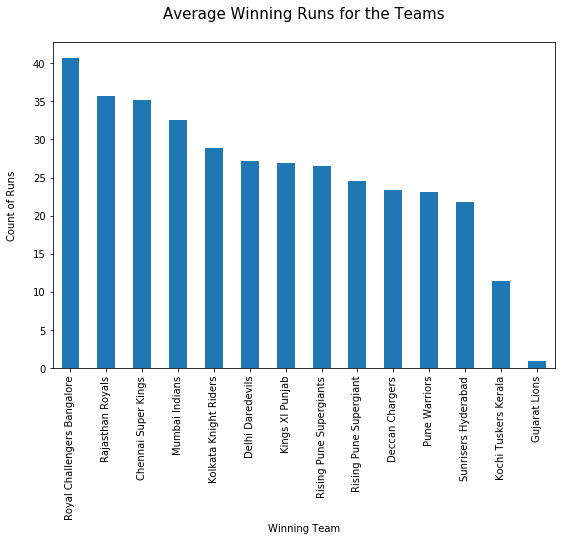

In [38]:
plt.figure(figsize = (9,6))
df[df.win_by_runs != 0].groupby('winner')['win_by_runs'].mean().sort_values(ascending = False).plot(kind = 'bar');
plt.ylabel('Count of Runs\n', fontsize = 10);
plt.xlabel('Winning Team', fontsize = 10);
plt.title('Average Winning Runs for the Teams\n', fontsize = 15);

**Observation**

- Of the all winning matches of the teams, `Royal Challengers Bangalore` has the controlled the opponent team well to secune a win with more runs and where as `Gujarat Lions` with the least.

In [23]:
#finding the average winning wickets for teams using groupby function

df[df.win_by_wickets != 0].groupby('winner')['win_by_wickets'].mean()

winner
Chennai Super Kings            6.281250
Deccan Chargers                6.545455
Delhi Daredevils               6.600000
Gujarat Lions                  5.416667
Kings XI Punjab                6.342857
Kochi Tuskers Kerala           7.500000
Kolkata Knight Riders          6.326087
Mumbai Indians                 6.136364
Pune Warriors                  6.000000
Rajasthan Royals               6.131579
Rising Pune Supergiant         6.200000
Rising Pune Supergiants        6.666667
Royal Challengers Bangalore    6.585366
Sunrisers Hyderabad            6.500000
Name: win_by_wickets, dtype: float64

### What are the average winning wickets left for teams while chasing the total?

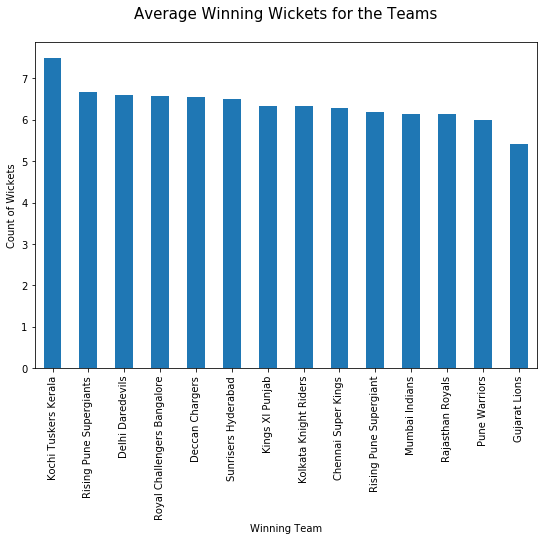

In [37]:
#finding the average winning wickets for teams using groupby function

plt.figure(figsize = (9,6))
df[df.win_by_wickets != 0].groupby('winner')['win_by_wickets'].mean().sort_values(ascending = False).plot(kind = 'bar');
plt.ylabel('Count of Wickets', fontsize = 10);
plt.xlabel('Winning Team', fontsize = 10);
plt.title('Average Winning Wickets for the Teams\n', fontsize = 15);

**Observation**

- Of the all winning matches of the teams, Kochi Tuskers Kerala won with highest wickets left whereas Gujarat Lions has the least wickets left.

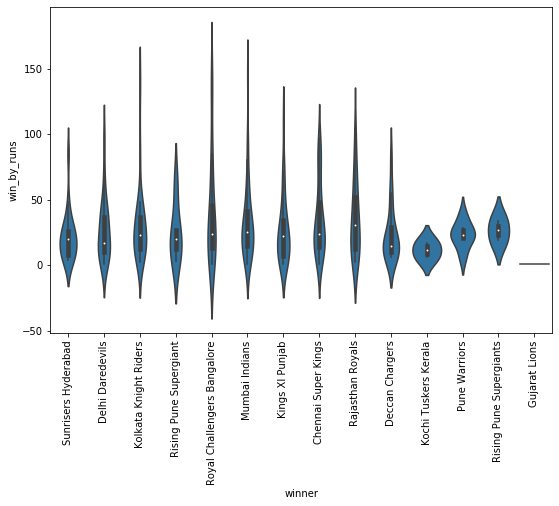

In [25]:
## violin plot to find average winning runs for teams

plt.figure(figsize = (9,6))
base_colour = sns.color_palette()[0]
sns.violinplot(data = df[df.win_by_runs != 0], x = 'winner', y = 'win_by_runs', color = base_colour);
plt.xticks(rotation = 90);

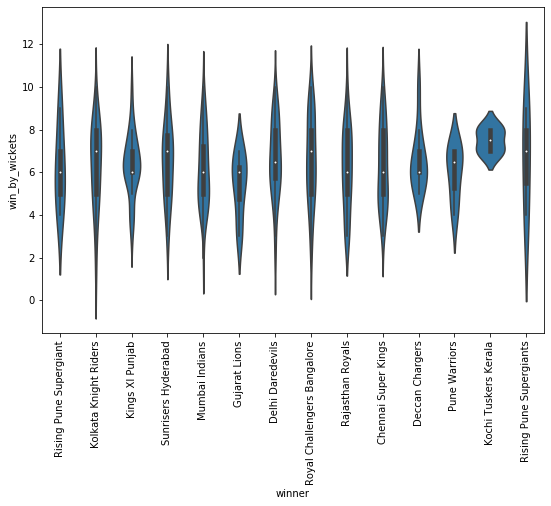

In [26]:
## violin plot to find average winning wickets for teams

plt.figure(figsize = (9,6))
sns.violinplot(data = df[df.win_by_wickets != 0], x = 'winner', y = 'win_by_wickets', color = base_colour);
plt.xticks(rotation = 90);

### What is the toss decision ratio for the teams ?

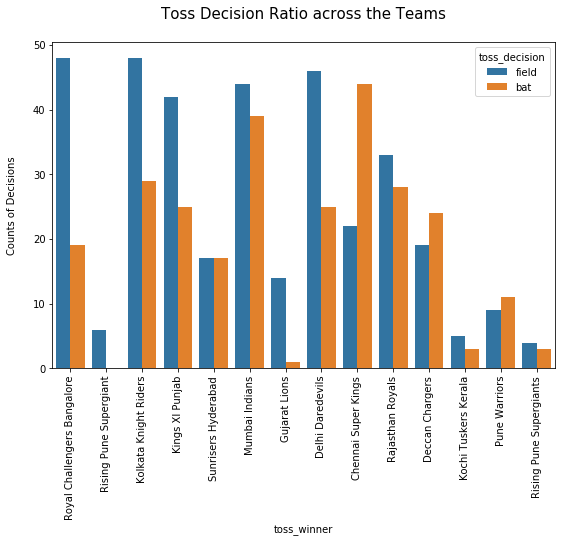

In [36]:
plt.figure(figsize = (9,6))
sns.countplot(data = df, x = 'toss_winner',  hue = 'toss_decision');
plt.xticks(rotation = 90);
plt.ylabel('Counts of Decisions\n', fontsize = 10);
plt.title('Toss Decision Ratio across the Teams\n', fontsize = 15);

**Observation**

- There is huge difference betweeen no. of times times `Royal Challengers Bangalore` opted to bat and chose to field after winning the toss.

### Multivariate Analysis

### How the  Winner, Toss Decision and Winning Wickets are interrelated ?

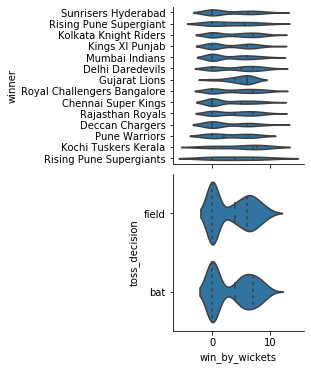

In [34]:
## Using FacetGrid to understand relationship between three variables

g = sns.PairGrid(data = df, x_vars = [ 'win_by_wickets'], y_vars = ['winner','toss_decision']);
g.map(sns.violinplot, inner = 'quartile');


**Observation**

- There is huge variation for the team `Rising Pune Supergiants` in number of wickets left after winning where as `Gujarat Lions` has the least.